<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_birthweight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')

In [9]:
url <- 'https://docs.google.com/spreadsheets/d/1G4qtGI3M3KglXDK2qhNGB0hCpao9XjZ6NZenbEMhibI/edit?usp=sharing'
bw <- gsheet2tbl(url)
head(bw)

gestage,birthweight,sex
<dbl>,<dbl>,<dbl>
40,2968,1
38,2795,1
40,3163,1
35,2925,1
36,2625,1
37,2847,1


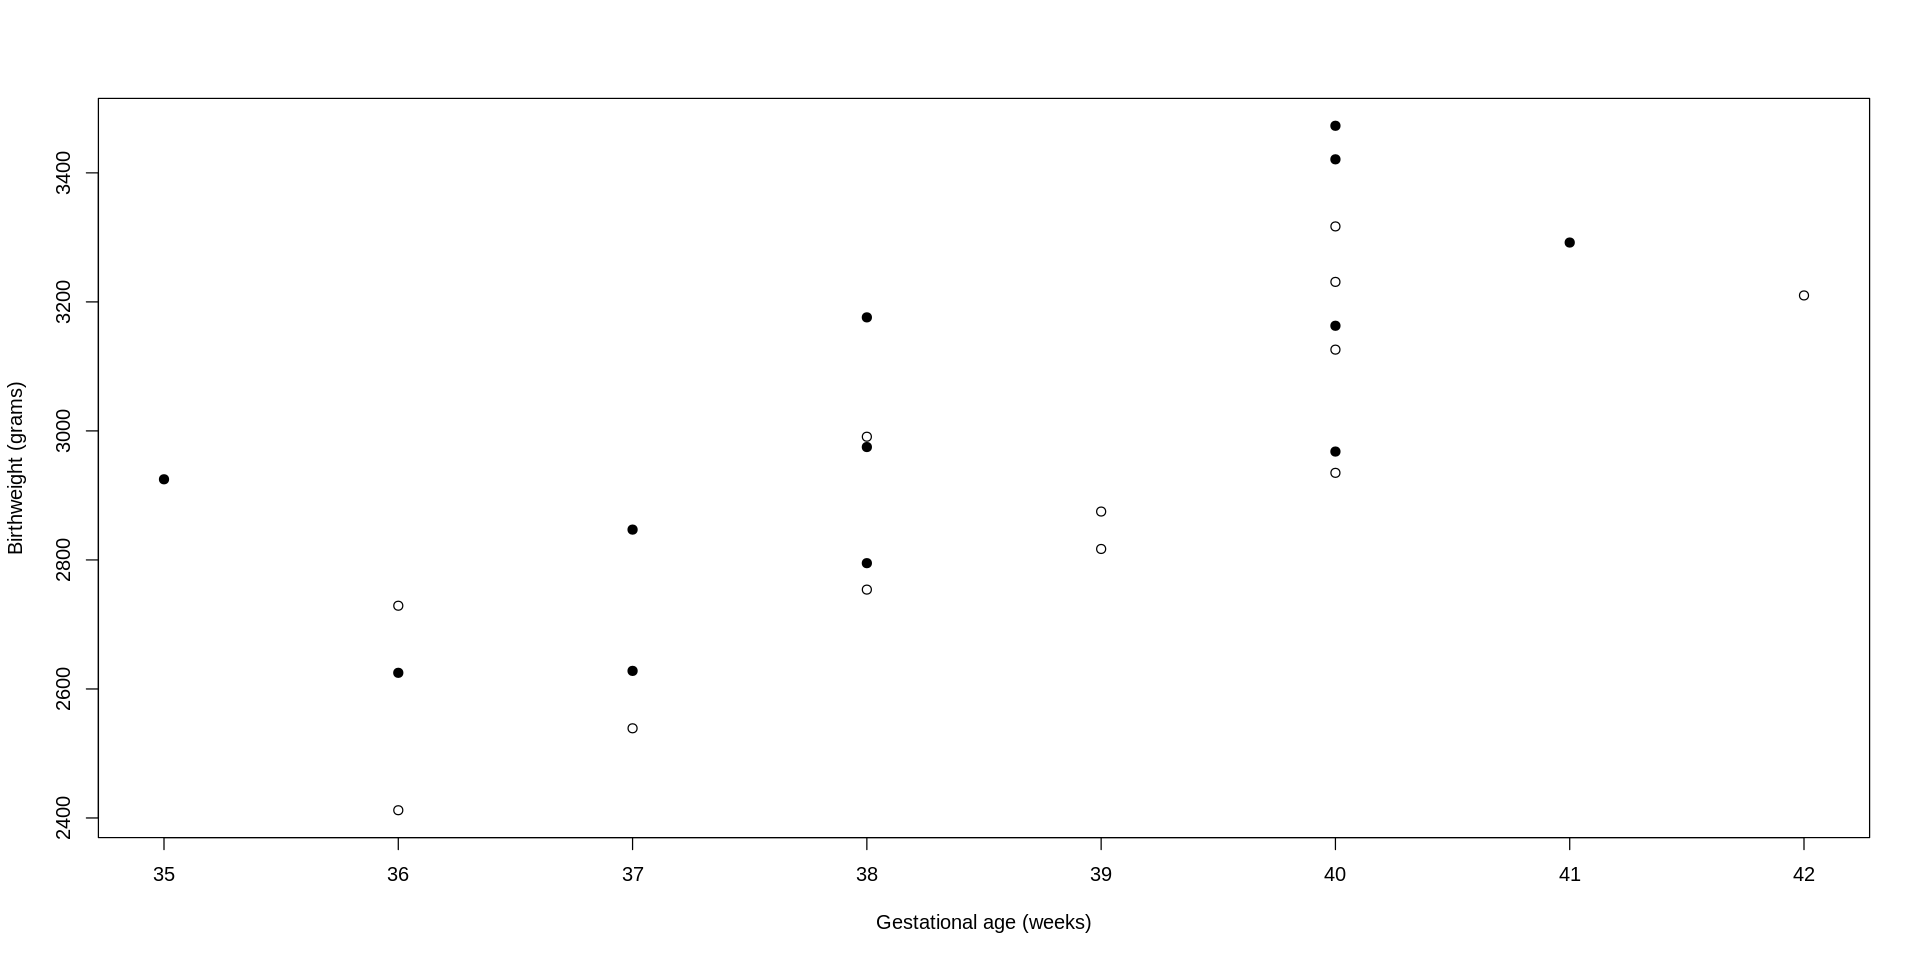

In [33]:
# set plot size
options(repr.plot.width=16, repr.plot.height=8)

#png("birthweight.png", width = 7, height = 5.5, units="in", res=1024)
plot(bw$gestage, bw$birthweight, pch=17+2*bw$sex, xlab="Gestational age (weeks)" , ylab="Birthweight (grams)")
#dev.off()

In [34]:
# Null model:
m0 <- lm(birthweight ~ gestage+sex,data=bw)
summary(m0)


Call:
lm(formula = birthweight ~ gestage + sex, data = bw)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.49 -125.28  -58.44  169.00  303.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1447.24     784.26  -1.845   0.0791 .  
gestage       120.89      20.46   5.908 7.28e-06 ***
sex          -163.04      72.81  -2.239   0.0361 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 177.1 on 21 degrees of freedom
Multiple R-squared:   0.64,	Adjusted R-squared:  0.6057 
F-statistic: 18.67 on 2 and 21 DF,  p-value: 2.194e-05


In [35]:
# Alternative model:
m1 <- lm(birthweight ~ gestage*sex,data=bw)
summary(m1)


Call:
lm(formula = birthweight ~ gestage * sex, data = bw)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.69 -138.11  -39.13  176.57  274.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -395.68    2514.69  -0.157    0.877
gestage        93.57      65.38   1.431    0.168
sex          -872.99    1611.33  -0.542    0.594
gestage:sex    18.42      41.76   0.441    0.664

Residual standard error: 180.6 on 20 degrees of freedom
Multiple R-squared:  0.6435,	Adjusted R-squared:   0.59 
F-statistic: 12.03 on 3 and 20 DF,  p-value: 0.000101


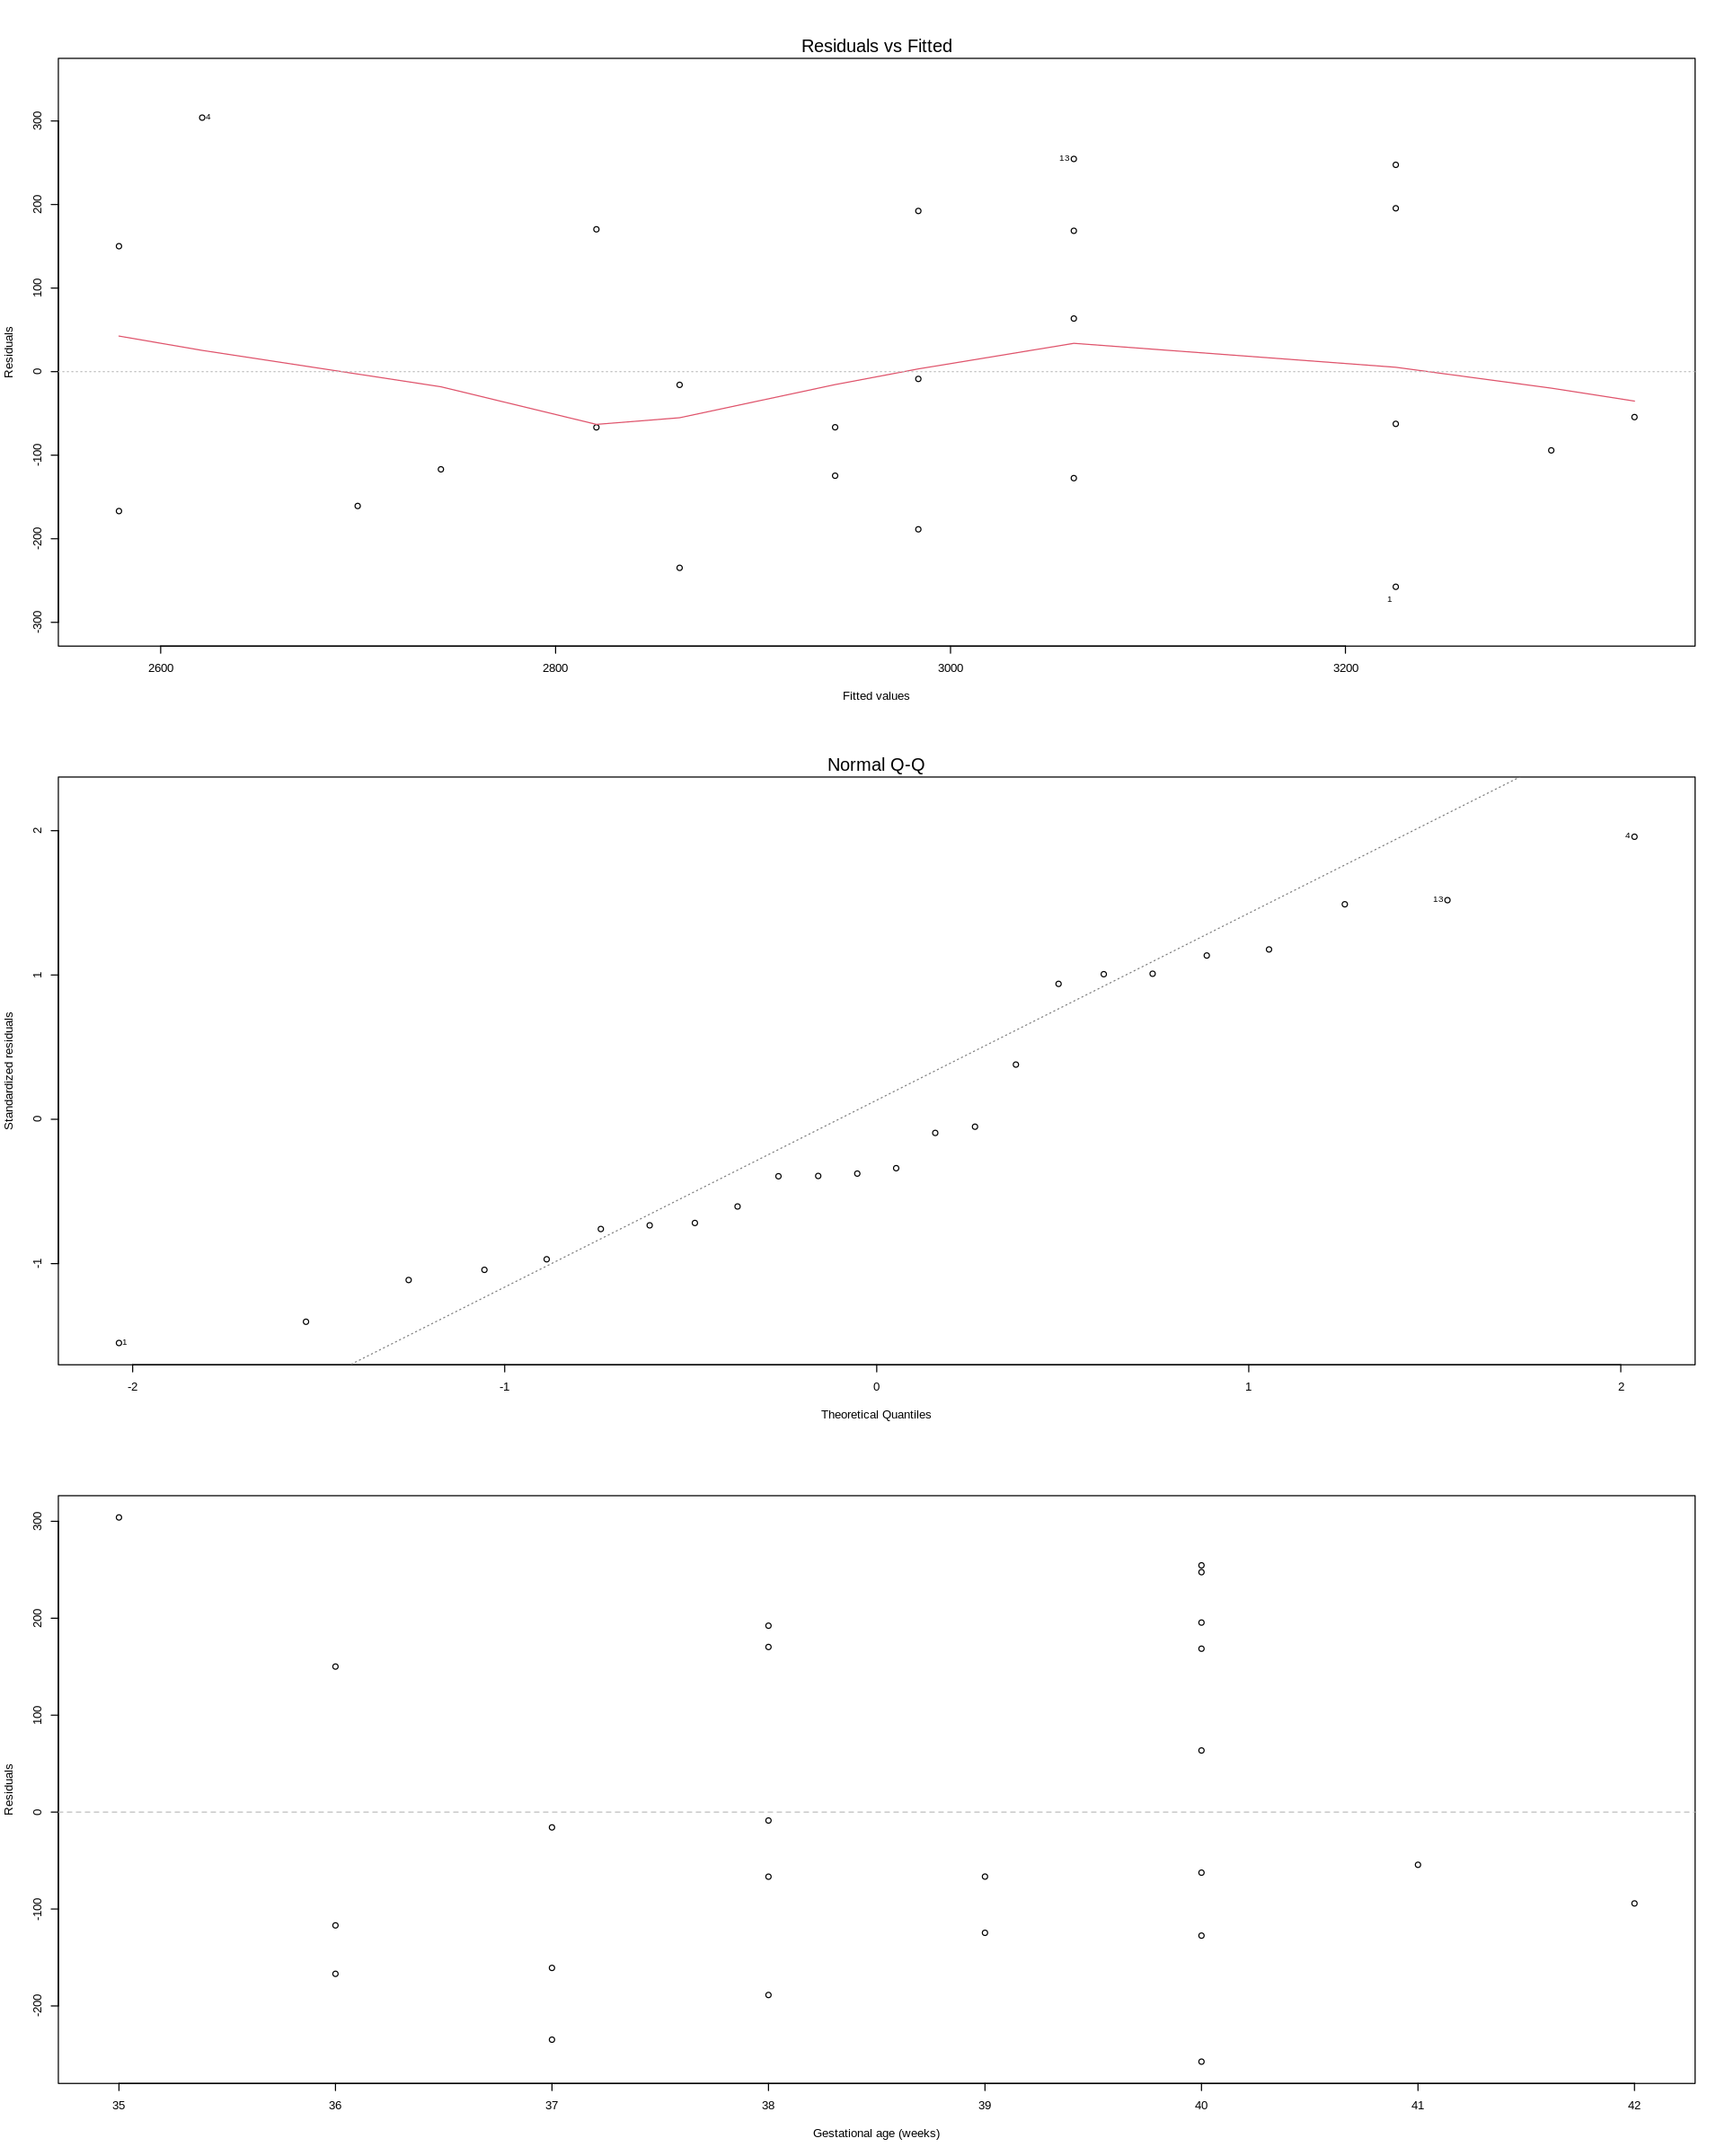

In [40]:
# set plot size
options(repr.plot.width=16, repr.plot.height=20)

# Residual plots
#png("resbwm0.png", width = 7, height = 5.5, units="in", res=1024)
par(mfrow=c(3,1))
plot(m0, which=1:2)
plot(bw$gestage, resid(m0), xlab="Gestational age (weeks)" , ylab="Residuals")
abline(h=0, col="grey", lty=2)
#dev.off()

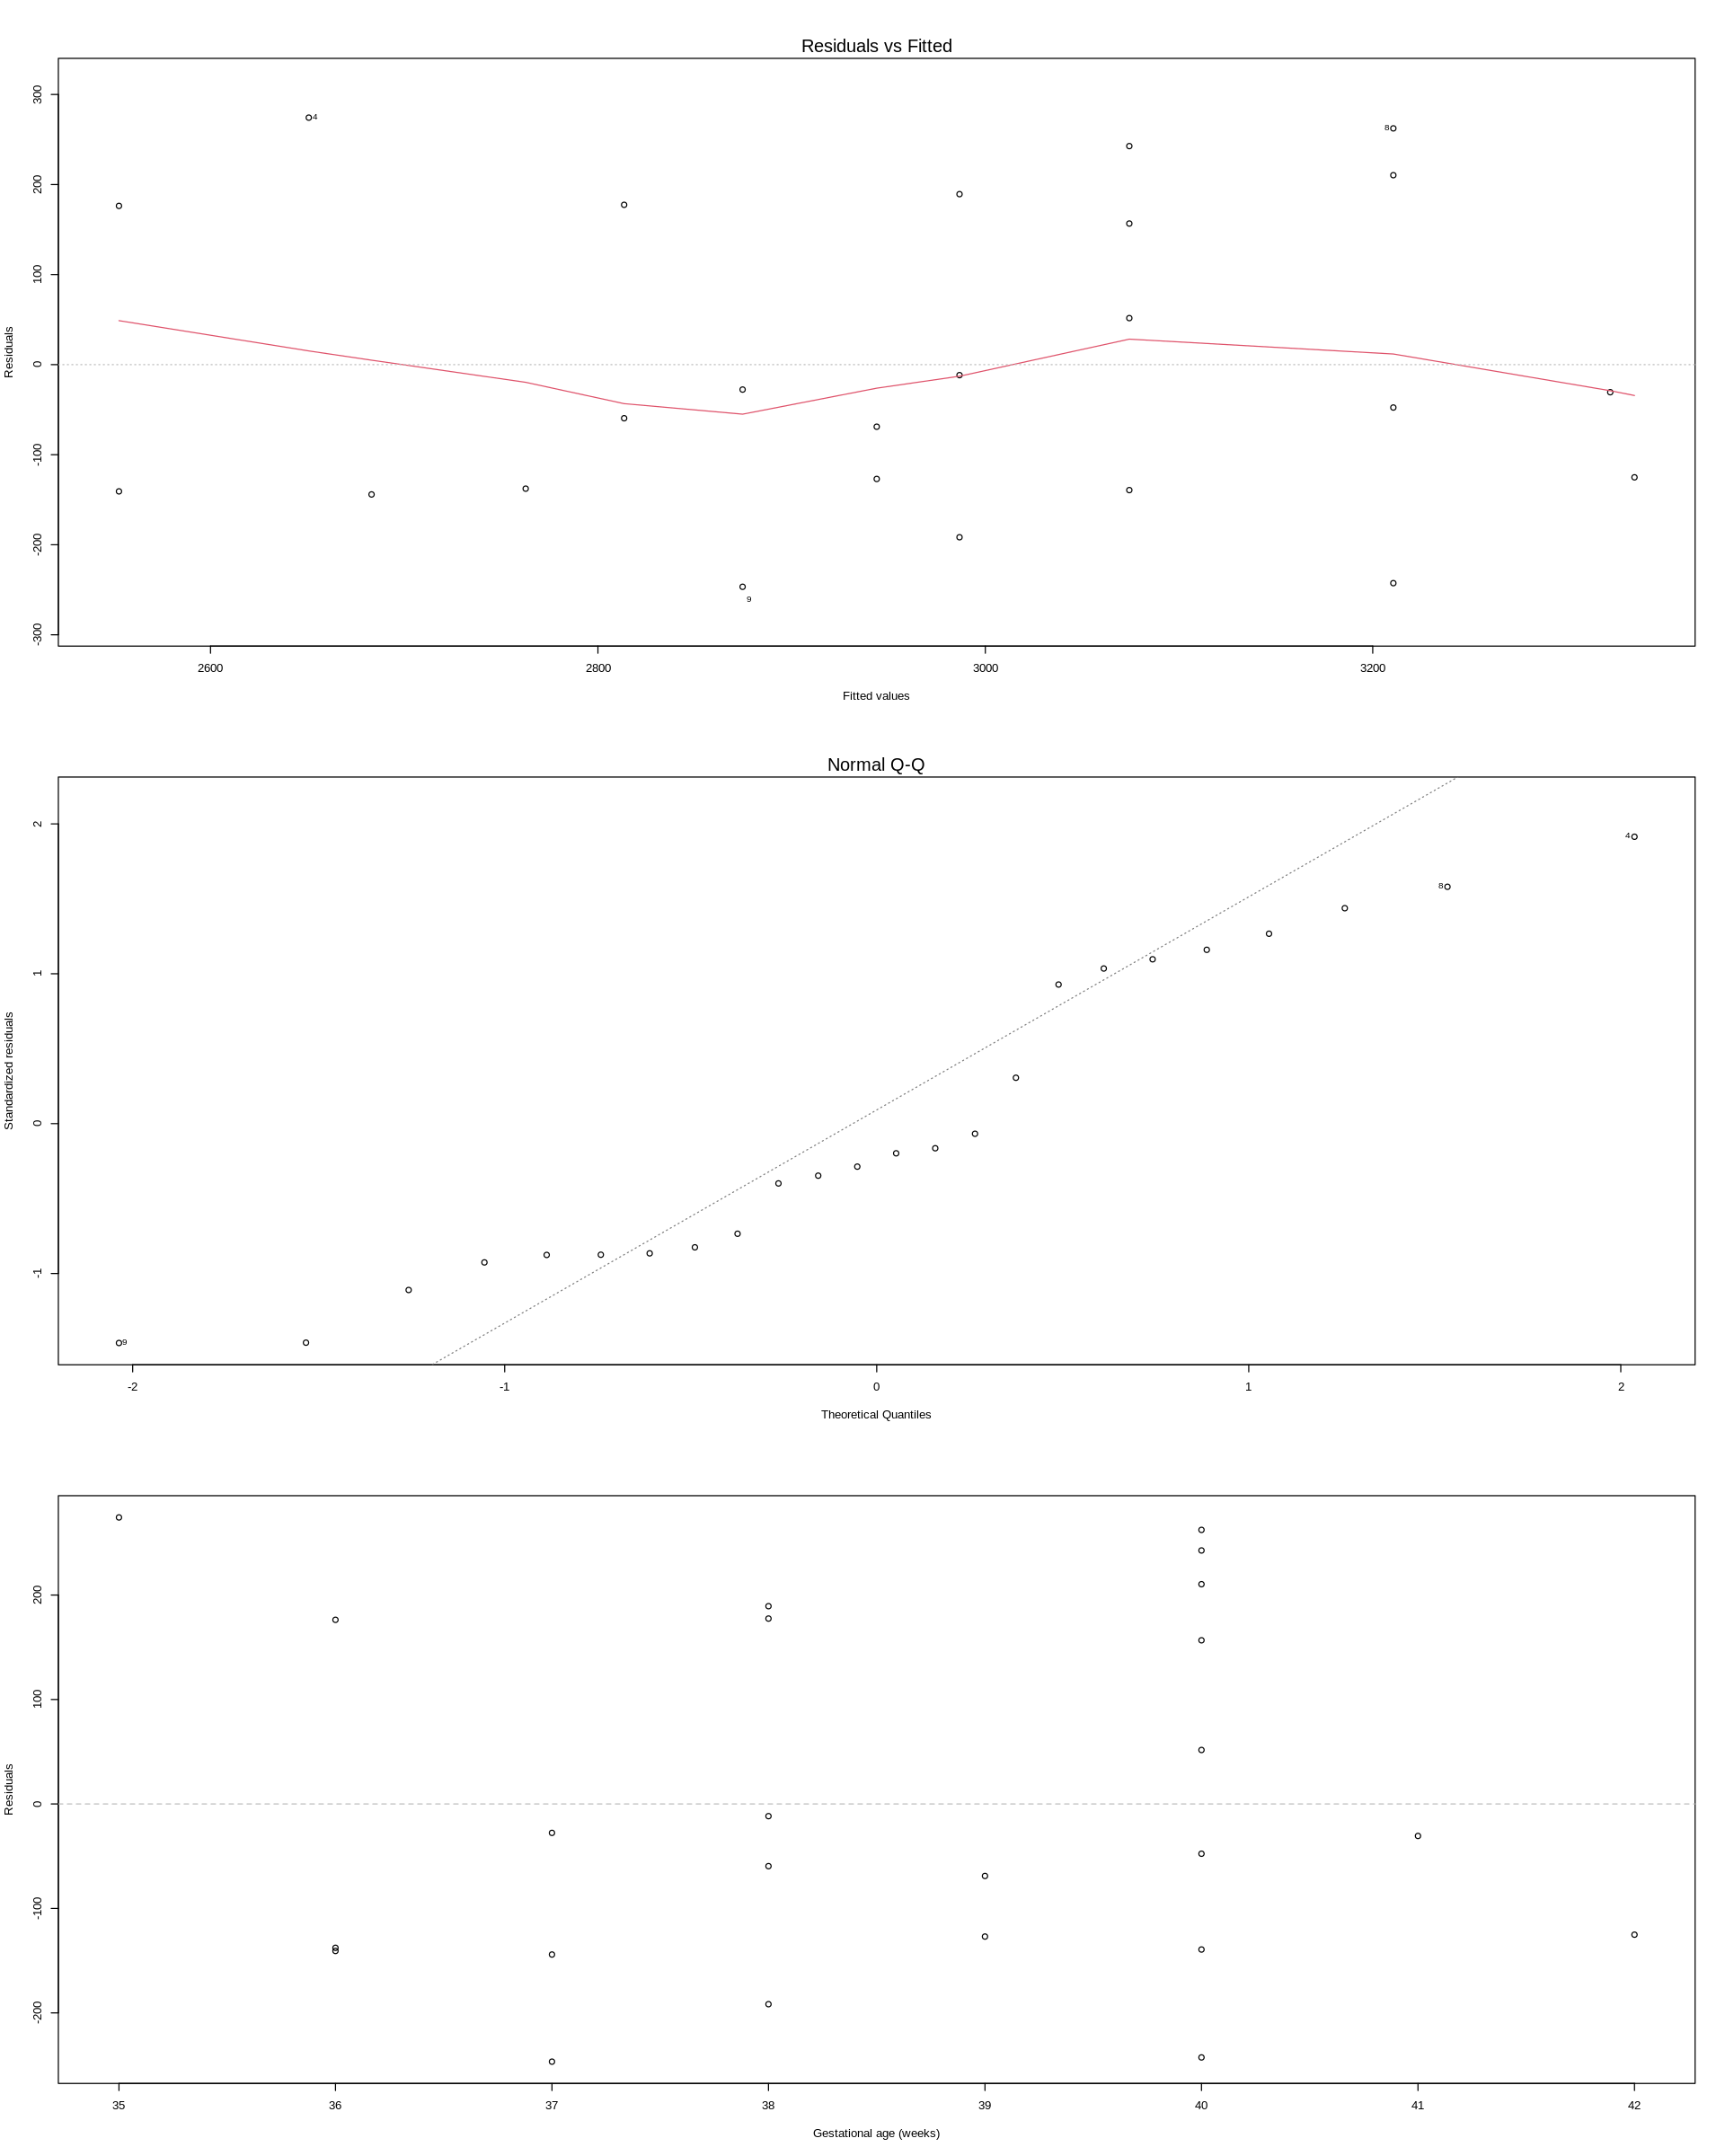

In [41]:
#png("resbwm1.png", width = 7, height = 5.5, units="in", res=1024)
par(mfrow=c(3,1))
plot(m1, which=1:2)
plot(bw$gestage, resid(m1), xlab="Gestational age (weeks)" , ylab="Residuals")
abline(h=0, col="grey", lty=2)
#dev.off()